In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
datas = {'Outlook': ["sunny", "sunny", "overcast", "rainy", "rainy", "rainy", "overcast", "sunny", "sunny", "rainy", "sunny",  "overcast",  "overcast", "rainy"],
        'Temperature': ["hot", "hot", "hot", "mild", "cool", "cool", "cool", "mild", "cool", "mild", "mild", "mild", "hot", "mild"],
        'Humidity':["high", "high", "high", "high", "normal", "normal", "normal", "high", "normal", "normal", "normal", "high", "normal", "high"],
        'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
        'Play': ["no", "no", "yes", "yes", "yes", "no", "yes", "no", "yes", "yes", "yes", "yes", "yes", "no"]}

df = pd.DataFrame(data=	datas)
df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
categorical_features = df.select_dtypes(exclude=['number'])
categorical_features.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play'], dtype='object')

In [ ]:
categorical_features
categorical_features = categorical_features.drop('Play', axis=1)

In [ ]:
encoder= OneHotEncoder(sparse_output=False)
one_encoded = encoder.fit_transform(categorical_features)
df_new = pd.DataFrame(one_encoded, columns= encoder.get_feature_names_out(categorical_features.columns))
df_new = df_new.astype('int')

In [ ]:
df = pd.concat([df_new, df['Play']], axis=1)
df

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_False,Windy_True,Play
0,0,0,1,0,1,0,1,0,1,0,no
1,0,0,1,0,1,0,1,0,0,1,no
2,1,0,0,0,1,0,1,0,1,0,yes
3,0,1,0,0,0,1,1,0,1,0,yes
4,0,1,0,1,0,0,0,1,1,0,yes
5,0,1,0,1,0,0,0,1,0,1,no
6,1,0,0,1,0,0,0,1,0,1,yes
7,0,0,1,0,0,1,1,0,1,0,no
8,0,0,1,1,0,0,0,1,1,0,yes
9,0,1,0,0,0,1,0,1,1,0,yes


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

decision_tree = DecisionTreeClassifier(criterion='entropy')
X= df_new.copy()
y= df['Play']

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)
X_train.shape, X_test.shape

((9, 10), (5, 10))

In [ ]:
training_data = pd.concat([X_train, y_train], axis=1)
# training_data = training_data[:9]
training_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_False,Windy_True,Play
2,1,0,0,0,1,0,1,0,1,0,yes
10,0,0,1,0,0,1,0,1,0,1,yes
5,0,1,0,1,0,0,0,1,0,1,no
11,1,0,0,0,0,1,1,0,0,1,yes
13,0,1,0,0,0,1,1,0,0,1,no
1,0,0,1,0,1,0,1,0,0,1,no
0,0,0,1,0,1,0,1,0,1,0,no
4,0,1,0,1,0,0,0,1,1,0,yes
9,0,1,0,0,0,1,0,1,1,0,yes


In [ ]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5555555555555556, 0.9, 'Outlook_overcast <= 0.5\nentropy = 0.918\nsamples = 12\nvalue = [4, 8]\nclass = yes'),
 Text(0.4444444444444444, 0.7, 'Humidity_normal <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]\nclass = yes'),
 Text(0.2222222222222222, 0.5, 'Outlook_rainy <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = no'),
 Text(0.1111111111111111, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = no'),
 Text(0.3333333333333333, 0.3, 'Windy_False <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = no'),
 Text(0.2222222222222222, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no'),
 Text(0.4444444444444444, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = yes'),
 Text(0.6666666666666666, 0.5, 'Windy_True <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = yes'),
 Text(0.5555555555555556, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = yes'),
 Text(0.7777777777777778, 0.3, 'Temperature_cool <= 0.5\nentropy =

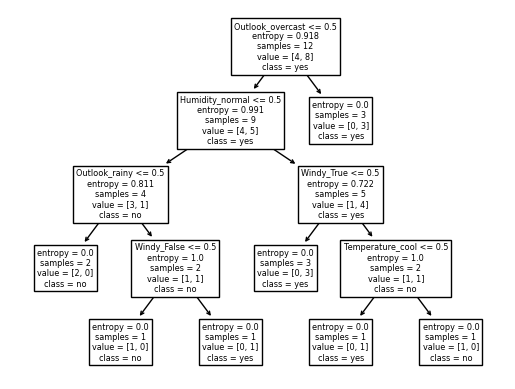

In [ ]:
tree.plot_tree(decision_tree, feature_names = X.columns, class_names = ['no', 'yes'])

In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
pd.DataFrame([y_pred, y_test], index=['Predicted', 'True'])

,0,1,2,3,4
Predicted,no,no,yes,yes,yes
True,yes,no,yes,yes,yes


In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_False,Windy_True,Play
3,0,1,0,0,0,1,1,0,1,0,yes
7,0,0,1,0,0,1,1,0,1,0,no
12,1,0,0,0,1,0,0,1,1,0,yes
6,1,0,0,1,0,0,0,1,0,1,yes
8,0,0,1,1,0,0,0,1,1,0,yes


In [ ]:
con_matrix = confusion_matrix(y_test, y_pred)
con_matrix

array([[1, 0],
       [1, 3]])

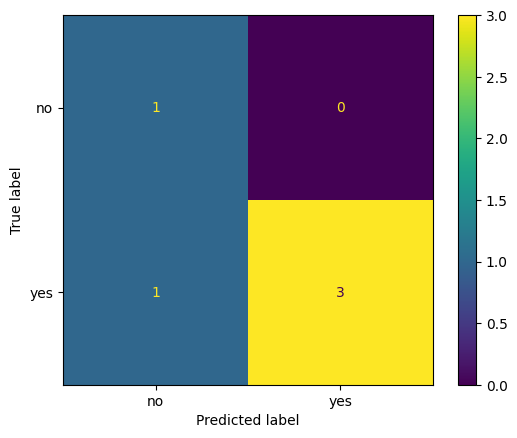

In [ ]:
display_con_matrix = ConfusionMatrixDisplay(confusion_matrix = con_matrix, display_labels = decision_tree.classes_)
display_con_matrix.plot()

<Axes: >

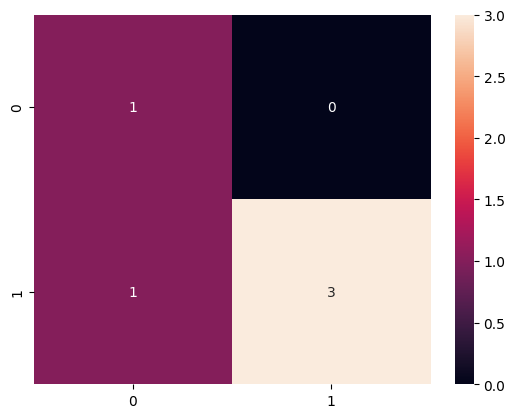

In [ ]:
import seaborn as sns
sns.heatmap(con_matrix, annot=True, fmt='d')

In [ ]:
class_report = metrics.classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

          no       0.50      1.00      0.67         1
         yes       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



In [ ]:
(training_data['Play'] == 'yes').sum()

5

In [ ]:
(training_data['Play'] == 'no').sum()

4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
X_train.shape, X_test.shape

((12, 10), (2, 10))

In [ ]:
training_data = pd.concat([X_train, y_train], axis=1)
# training_data = training_data[:9]
training_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_False,Windy_True,Play
9,0,1,0,0,0,1,0,1,1,0,yes
3,0,1,0,0,0,1,1,0,1,0,yes
10,0,0,1,0,0,1,0,1,0,1,yes
12,1,0,0,0,1,0,0,1,1,0,yes
13,0,1,0,0,0,1,1,0,0,1,no
4,0,1,0,1,0,0,0,1,1,0,yes
8,0,0,1,1,0,0,0,1,1,0,yes
0,0,0,1,0,1,0,1,0,1,0,no
5,0,1,0,1,0,0,0,1,0,1,no
11,1,0,0,0,0,1,1,0,0,1,yes


In [ ]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
pd.DataFrame([y_pred, y_test], index=['Predicted', 'True'])

,0,1
Predicted,no,yes
True,no,yes


In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_False,Windy_True,Play
1,0,0,1,0,1,0,1,0,0,1,no
2,1,0,0,0,1,0,1,0,1,0,yes


In [ ]:
con_matrix = confusion_matrix(y_test, y_pred)
con_matrix

array([[1, 0],
       [0, 1]])

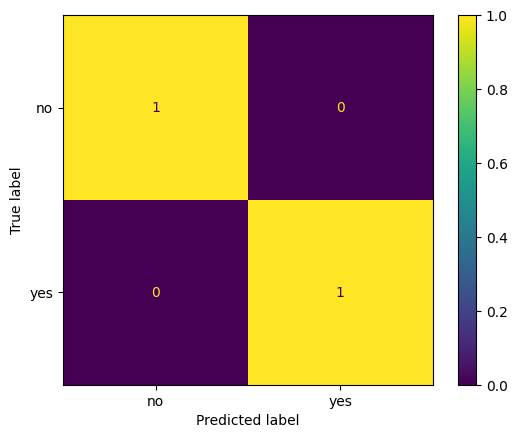

In [ ]:
display_con_matrix = ConfusionMatrixDisplay(confusion_matrix = con_matrix, display_labels = decision_tree.classes_)
display_con_matrix.plot()

<Axes: >

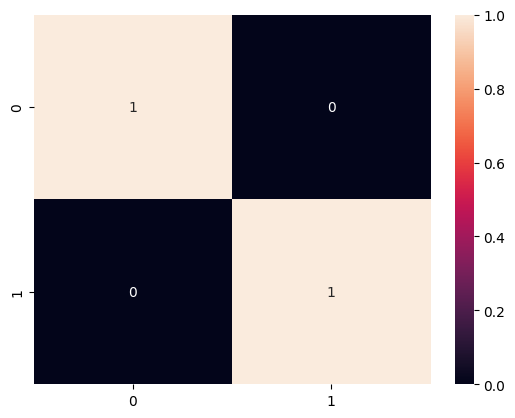

In [ ]:
import seaborn as sns
sns.heatmap(con_matrix, annot=True, fmt='d')

In [ ]:
class_report = metrics.classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

          no       1.00      1.00      1.00         1
         yes       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
(training_data['Play'] == 'yes').sum()

8

In [ ]:
(training_data['Play'] == 'no').sum()

4